# Projeto do curso de Análise Exploratória de Dados

Alunos:     André de Abreu Ferreira e 
            Vinicius Motta dos Santos

Professor:   Allan Suzuki 

Objetivo

Analisar uma campanha de crédito realizada por um banco ingles por meio de telemarketing na busca de recomendações para próximas campanhas.
As recomendações podem ser estender a gerência negócio e a d marketing.

Fonte: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling 

Os dados estão dispostos no arquivo: `Projectdata_Bank_Personal_Loan_Modelling.csv`

Descrições das colunas:


*($000) siginifica que cada unidade representa 1000 USD 

Coluna do arquivo       Descrição
Customer ID -           ID do cliente
Age                     Idade do cliente em anos completos Experiência #anos de experiência profissional
Income                  Renda - Renda anual do cliente ($000)
ZIPCode                 CEP Endereço residencial CEP. 
Family                  Família - Tamanho da família do cliente
CCAvg                   CCA Média - Gastos com cartões de crédito por mês ($ 000)
Education               Educação - Nível de educação. 1: Estudante universitário; 2: Esnisno Superior; 3: Avançado/Profissional
Mortagage               Valor hipotecário - da hipoteca da casa, se houver. (US$ 000)
Personal Loan           Empréstimo Pessoal - Este cliente aceitou o empréstimo pessoal oferecido na última campanha?
Securities Account      Conta de Valores Mobiliários - O cliente possui uma conta de valores mobiliários no banco?
CD Account              Conta CD - O cliente possui uma conta de certificado de depósito (CD) no banco?
Online                  O cliente utiliza serviços de internet banking?
CreditCard              Cartão de Crédito - O cliente utiliza cartão de crédito emitido pelo UniversalBank?

Metodologia de trabalho:

1   - Carga dados do arquivo <br>
1.1 - Verificar a estrutura dos dados<br>
2   - Verificar insconstências<br>
2.1 - Tratamento dos registros duplicados<br>
2.2 - Tratamento de registro nulos<br>
   - REalizar tratamento as inconsitências<br>
   - Verificar Outlier<br>
3




1 - Carga de dados do arquivo 
Carga do arquivo CSV em um DataFrame para início do trabalho.
Neste momento serão importadas as bibliotecas necessárias para as atividades

In [1]:
#importar
import pandas as pd
import seaborn as sns
import numpy as np
# !python -m pip install phik
import matplotlib.pyplot as plt

# Lendo um arquivo CSV e criando um DataFrame
df_loan = pd.read_csv('./data/Projectdata_Bank_Personal_Loan_Modelling.csv')

# Exir os dados dos arquivos para conferência
df_loan

FileNotFoundError: [Errno 2] No such file or directory: './data/Projectdata_Bank_Personal_Loan_Modelling.csv'

1.1  - Verificando estruturas de dados
Exibir todas as possíveis informações basicas do dataset (tamanho, tipos de dados, ...)

In [ ]:
# Verificando a matriz do arquivo (linha x coluna)
df_loan.shape

(5178, 14)

Foi verificado que o arquivo contém 5.177 linhas e 14 colunas e 1 linha do header.

Vamos verificar um resumos do aquivo:

In [ ]:
#  Detalhando o arquivo
df_loan.info()

# Trazendo informações de quantidade, mínimo, máximo, média, mediana e as porcentagens de 25% a 75% (step de 25%). 
df_loan.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5178 non-null   int64  
 1   Age                 5178 non-null   int64  
 2   Experience          5178 non-null   int64  
 3   Income              5178 non-null   int64  
 4   ZIP Code            5178 non-null   int64  
 5   Family              5178 non-null   int64  
 6   CCAvg               5178 non-null   float64
 7   Education           5138 non-null   float64
 8   Mortgage            5178 non-null   int64  
 9   Personal Loan       5178 non-null   int64  
 10  Securities Account  5178 non-null   int64  
 11  CD Account          5178 non-null   int64  
 12  Online              5129 non-null   float64
 13  CreditCard          5178 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 566.5 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5138.000000,5178.00000,5178.000000,5178.000000,5178.000000,5129.000000,5178.000000
mean,2501.993820,45.296253,20.062186,73.653341,93148.713017,2.394361,1.932837,1.881082,56.74102,0.096176,0.104867,0.059482,0.594463,0.294129
std,1444.527705,11.448312,11.456867,46.011838,2111.707635,1.145804,1.749178,0.839499,101.90350,0.294861,0.306411,0.236548,0.491044,0.455694
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.250000,35.000000,10.000000,39.000000,91910.000000,1.000000,0.700000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2506.500000,45.000000,20.000000,64.000000,93407.000000,2.000000,1.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3754.750000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.00000,1.000000,1.000000,1.000000,1.000000,1.000000


2   - Verificar insconstências
Mapear duplicidades ou campos em branco 

In [ ]:
# Identificar linhas duplicadas com base em todas as colunas, exceto o ID
Reg_duplicadas = df_loan[df_loan.duplicated()]

# Contar o número total de linhas duplicadas
quant_reg_duplicadas = Reg_duplicadas.shape[0]
print(f"Quantidade de  linhas duplicadas: {quant_reg_duplicadas}")
print(Reg_duplicadas)


Quantidade de  linhas duplicadas: 90
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
5042  1946   57          33      30     93106       3    1.5        1.0   
5089  1778   52          27      34     93117       2    0.7        2.0   
5090   315   63          37      45     93437       2    0.7        3.0   
5091  3650   53          29      85     92691       3    1.8        2.0   
5092  1125   38          12      29     94022       4    0.2        1.0   
...    ...  ...         ...     ...       ...     ...    ...        ...   
5173  2298   59          35      31     94063       3    0.4        2.0   
5174  1785   54          29     119     91355       3    2.0        1.0   
5175  2010   25           0      99     92735       1    1.9        1.0   
5176  3318   65          41      79     90035       3    2.0        3.0   
5177     1   25           1      49     91107       4    1.6        1.0   

      Mortgage  Personal Loan  Securities Account  CD Account 

2.1 - Tratamento dos registros duplicados
Mapear e remover registros duplicados
Salvar umo no arquivo com registros saneados 
Realizar verificação se a ação de saneamento de registros duplicados foi bem sucedida

In [ ]:
# Mapear e remover registros duplicados
df_manutencao = df_loan.drop_duplicates(subset=df_loan.columns.difference(['ID']))

# Salvar arquivo novo com dados saneamentos a fim de manter integro o arquivo original
loan_manutencao_arquivo = "./data/Projectdata_Bank_Personal_Loan_Modelling_Atualizado.csv"
df_manutencao.to_csv(loan_manutencao_arquivo, index=False)

# Realizar verificação se o processo de remoção foi bem sucedido 
total_reg = df_manutencao.duplicated(subset=df_manutencao.columns.difference(['ID'])).sum()
print(f"Total de linhas duplicadas após limpeza: {total_reg }")


Total de linhas duplicadas após limpeza: 0


2.2 - Tratamento de registro nulos

In [ ]:
# Identificar colunas com dados nulos e contar o número de valores nulos em cada coluna
quant_reg_nulos = df_manutencao.isnull().sum()

# Filtrar as colunas com valores nulos
quant_reg_nulos = quant_reg_nulos[quant_reg_nulos > 0]

if quant_reg_nulos.empty:
    print("Não há dados nulos no dataframe.")
else:
    print("Colunas com dados nulos:")
    print(quant_reg_nulos)
   




Colunas com dados nulos:
Education    40
Online       48
dtype: int64
40


4. Filtre o dataframe entre clientes que possuem e não possuem CDB na column `CD Account` com as categorias `1` e `0`, respectivamente.<br>
Salve os filtros (máscaras booleanas) em variáveis diferentes.

In [ ]:
CDB_0 = df_loan['CD Account'] == 0
CDB_0

0        True
1        True
2        True
3        True
4        True
        ...  
5173     True
5174    False
5175     True
5176     True
5177     True
Name: CD Account, Length: 5178, dtype: bool

In [ ]:
CDB_0 = df_loan['CD Account'] == 1
CDB_0

0       False
1       False
2       False
3       False
4       False
        ...  
5173    False
5174     True
5175    False
5176    False
5177    False
Name: CD Account, Length: 5178, dtype: bool

In [ ]:
df_loan[''].count()

5. Realizamoas agrupamentos a fim de obter relações dos diversos campos. A fim de análise consideramos importantes fazer categorias para nortar os agrupamentos: 
    - Pessoal
    + Idade 
    + Renda 
    + CEP 
    + Família 
    + Educação 

    - Bancários:
    + CCA Média 
    + Valor hipotecário 
    + Empréstimo Pessoal 
    + Conta de Valores Mobiliários 
    + Conta CD 
    + Online 
    + Cartão de Crédito  



Desta forma poderemos trazer visões sobre os aspectos familiar e bancário bem como cruzamentos entre eles.

In [ ]:
#Criando um dataframe identificando os cliente com imprestimos ou não
com_emprestimo = df_loan['CD Account'] == 1
sem_emprestimo = df_loan['CD Account'] == 0
com_emprestimo

print('----')

sem_emprestimo

----


0        True
1        True
2        True
3        True
4        True
        ...  
5173     True
5174    False
5175     True
5176     True
5177     True
Name: CD Account, Length: 5178, dtype: bool

In [ ]:
#Analisando os solteiros.
solteiro = df_loan['Family']==1
mais_membro = df_loan['Family'] > 1

In [ ]:
# mask de pessoas que aceitaram o emprestimo
mask_loan = df_loan['Personal Loan']==1

# mask de pessoas que utilizam o cartao de credito universal bank
mask_card = df_loan['CreditCard']==1

# mask de pessoas que tem hipoteca
mask_mortgage = df_loan['Mortgage']>0

# mask de pessoas que usam servicos online
mask_online = df_loan['Online']==1

df_loan[mask_loan & mask_card].count()

ID                    149
Age                   149
Experience            149
Income                149
ZIP Code              149
Family                149
CCAvg                 149
Education             147
Mortgage              149
Personal Loan         149
Securities Account    149
CD Account            149
Online                148
CreditCard            149
dtype: int64

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,149.000000,149.000000,149.000000,149.00000,149.000000,149.000000,149.00000,147.000000,149.000000,149.0,149.000000,149.000000,148.000000,149.0
mean,2524.315436,45.369128,20.228188,144.61745,93353.006711,2.704698,3.97349,2.176871,109.073826,1.0,0.114094,0.630872,0.560811,1.0
std,1356.999448,11.557348,11.530290,31.02671,1721.149386,1.118054,2.03982,0.782520,166.907447,0.0,0.318998,0.484196,0.497973,0.0
min,30.000000,26.000000,0.000000,73.00000,90025.000000,1.000000,0.10000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
25%,1412.000000,35.000000,10.000000,122.00000,92056.000000,2.000000,2.70000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
50%,2401.000000,45.000000,19.000000,142.00000,93955.000000,3.000000,3.80000,2.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.0
75%,3662.000000,55.000000,30.000000,170.00000,94720.000000,4.000000,5.40000,3.000000,221.000000,1.0,0.000000,1.000000,1.000000,1.0
max,4981.000000,65.000000,41.000000,201.00000,96008.000000,4.000000,10.00000,3.000000,587.000000,1.0,1.000000,1.000000,1.000000,1.0


In [ ]:
# realizar o describe
df_loan[mask_loan & mask_card].describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,149.000000,149.000000,149.000000,149.00000,149.000000,149.000000,149.00000,147.000000,149.000000,149.0,149.000000,149.000000,148.000000,149.0
mean,2524.315436,45.369128,20.228188,144.61745,93353.006711,2.704698,3.97349,2.176871,109.073826,1.0,0.114094,0.630872,0.560811,1.0
std,1356.999448,11.557348,11.530290,31.02671,1721.149386,1.118054,2.03982,0.782520,166.907447,0.0,0.318998,0.484196,0.497973,0.0
min,30.000000,26.000000,0.000000,73.00000,90025.000000,1.000000,0.10000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
25%,1412.000000,35.000000,10.000000,122.00000,92056.000000,2.000000,2.70000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
50%,2401.000000,45.000000,19.000000,142.00000,93955.000000,3.000000,3.80000,2.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.0
75%,3662.000000,55.000000,30.000000,170.00000,94720.000000,4.000000,5.40000,3.000000,221.000000,1.0,0.000000,1.000000,1.000000,1.0
max,4981.000000,65.000000,41.000000,201.00000,96008.000000,4.000000,10.00000,3.000000,587.000000,1.0,1.000000,1.000000,1.000000,1.0


In [ ]:
## Qual é o salário médio por educação pros clientes que aceitaram ou rejeitaram o empréstimo?
df_loan.groupby(['Education', 'Personal Loan'])['Income'].mean()

Education  Personal Loan
1.0        0                 83.054501
           1                136.061856
2.0        0                 52.103175
           1                145.464865
3.0        0                 53.206922
           1                148.094340
Name: Income, dtype: float64

<Axes: >

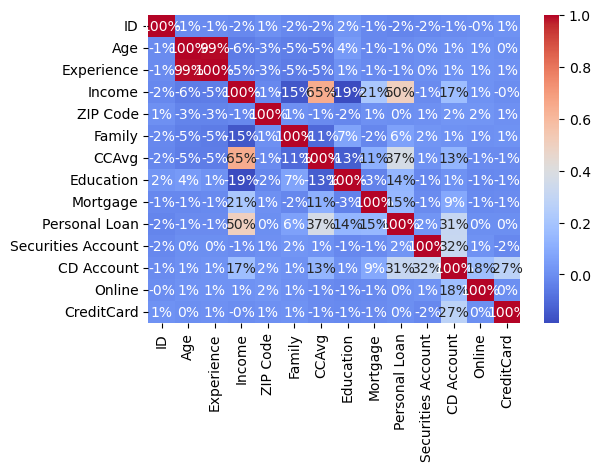

In [ ]:
# Calculando a matriz de correlação
correlacao = df_loan.corr()

# Criando um heatmap


In [ ]:
# Calculando a correlação
df_loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008563,-0.008188,-0.015458,0.008445,-0.016410,-0.021231,0.018937,-0.014871,-0.023398,-0.016784,-0.008620,-0.002778,0.013089
Age,-0.008563,1.000000,0.994152,-0.055324,-0.030992,-0.045148,-0.050778,0.040332,-0.014686,-0.008213,0.000668,0.008756,0.012625,0.003621
Experience,-0.008188,0.994152,1.000000,-0.046647,-0.030251,-0.051265,-0.048967,0.011837,-0.012461,-0.008232,0.000453,0.011322,0.012948,0.005043
Income,-0.015458,-0.055324,-0.046647,1.000000,-0.014983,-0.153693,0.645102,-0.185313,0.210096,0.503448,-0.005546,0.169731,0.012649,-0.000802
ZIP Code,0.008445,-0.030992,-0.030251,-0.014983,1.000000,0.008069,-0.005238,-0.019637,0.008290,0.000886,0.005016,0.020209,0.019319,0.008159
Family,-0.016410,-0.045148,-0.051265,-0.153693,0.008069,1.000000,-0.106264,0.065454,-0.019581,0.064382,0.023032,0.013211,0.007777,0.011242
CCAvg,-0.021231,-0.050778,-0.048967,0.645102,-0.005238,-0.106264,1.000000,-0.134570,0.114245,0.367575,0.010599,0.132459,-0.008868,-0.008799
Education,0.018937,0.040332,0.011837,-0.185313,-0.019637,0.065454,-0.134570,1.000000,-0.034006,0.136655,-0.014303,0.013117,-0.014292,-0.011802
Mortgage,-0.014871,-0.014686,-0.012461,0.210096,0.008290,-0.019581,0.114245,-0.034006,1.000000,0.146604,-0.007927,0.086270,-0.009550,-0.007927
Personal Loan,-0.023398,-0.008213,-0.008232,0.503448,0.000886,0.064382,0.367575,0.136655,0.146604,1.000000,0.020901,0.313988,0.001540,0.003628
